# Binary Image Classifier | Fear-Neutral

This aim of this project is to train deep learning models using the TensorFlow framework for the purpose of binary image classification for facial emotion recognition. The images used to train the models were retrieved from the __FER2013 dataset__ and the deep learning architecture used to build the models is __Convolutional Neural Network__. Data augmentation was implemented to improved the trained model. Seven different models were trained with a varying number of layers.
The emotions used on this image classifier are __fear__ and __neutral__. 

In [1]:
import tensorflow as tf
import os

import cv2
import imghdr

import numpy as np
import PIL
import pathlib
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
data_dir = "data/train"
os.listdir(data_dir)

['fear', 'neutral']

In [131]:
#Data count

data_path = pathlib.Path(data_dir)

image_count = len(list(data_path.glob('*/*.jpg')))
fear_image_count = len(list(data_path.glob('fear/*.jpg')))
neutral_image_count = len(list(data_path.glob('neutral/*.jpg')))
print("Fear: ", fear_image_count, "|", "Neutral: ", neutral_image_count)

Fear:  4097 | Neutral:  4965


In [132]:
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

9062


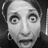

In [4]:
fear = list(data_dir.glob('fear/*'))
PIL.Image.open(str(fear[1]))

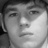

In [5]:
neutral = list(data_dir.glob('neutral/*'))
PIL.Image.open(str(neutral[1]))

### Load Data

In [6]:
batch_size = 32
img_height = 256
img_width = 256

#### Spliting data for training and validation

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9062 files belonging to 2 classes.
Using 7250 files for training.


2023-04-26 10:22:58.452091: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9062 files belonging to 2 classes.
Using 1812 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['fear', 'neutral']


In [10]:
num_classes = len(class_names)

### Visualising the data

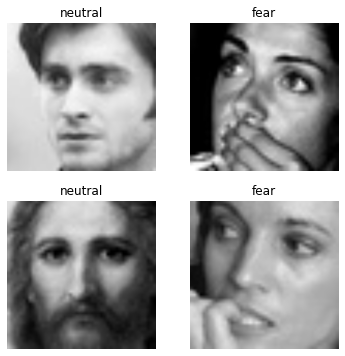

In [11]:
plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 256, 256, 3)
(32,)


### Scaling the data

In [13]:
normalization_layer = layers.Rescaling(1./255)

In [14]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))


0.013556986 1.0


### Building the deep learning model

#### 2 Layers

In [15]:
mod_2 = Sequential()

mod_2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_2.add(MaxPooling2D())

mod_2.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_2.add(MaxPooling2D())

mod_2.add(Flatten())

mod_2.add(Dense(256, activation='relu'))
mod_2.add(Dense(1, activation='sigmoid'))

In [16]:
mod_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
mod_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 256)               3

#### 3 Layers

In [18]:
mod_3 = Sequential()

mod_3.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Flatten())

mod_3.add(Dense(256, activation='relu'))
mod_3.add(Dense(1, activation='sigmoid'))

In [19]:
mod_3.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
mod_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 16)      

#### 4 Layers

In [21]:
mod_4 = Sequential()

mod_4.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Flatten())

mod_4.add(Dense(256, activation='relu'))
mod_4.add(Dense(1, activation='sigmoid'))

In [22]:
mod_4.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
mod_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)      

##### 5 Layers

In [24]:
mod_5 = Sequential()

mod_5.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Flatten())

mod_5.add(Dense(256, activation='relu'))
mod_5.add(Dense(1, activation='sigmoid'))

In [25]:
mod_5.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
mod_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 32)      

### Training the Models

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist_2 = mod_2.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/20
227/227 [==============================] - 139s 611ms/step - loss: 49.9223 - accuracy: 0.6150 - val_loss: 0.6281 - val_accuracy: 0.6694
Epoch 2/20
227/227 [==============================] - 138s 608ms/step - loss: 0.6031 - accuracy: 0.7048 - val_loss: 0.6296 - val_accuracy: 0.6832
Epoch 3/20
227/227 [==============================] - 142s 625ms/step - loss: 0.4407 - accuracy: 0.7968 - val_loss: 0.6506 - val_accuracy: 0.6772
Epoch 4/20
227/227 [==============================] - 147s 647ms/step - loss: 0.3258 - accuracy: 0.8603 - val_loss: 0.7347 - val_accuracy: 0.6794
Epoch 5/20
227/227 [==============================] - 146s 645ms/step - loss: 0.2425 - accuracy: 0.9000 - val_loss: 0.8903 - val_accuracy: 0.6589
Epoch 6/20
227/227 [==============================] - 143s 629ms/step - loss: 0.1669 - accuracy: 0.9393 - val_loss: 1.0605 - val_accuracy: 0.6705
Epoch 7/20
227/227 [==============================] - 149s 655ms/step - loss: 0.1421 - accuracy: 0.9488 - val_loss: 1.3411 

In [36]:
hist_3 = mod_3.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/20
227/227 [==============================] - 127s 557ms/step - loss: 5.9766 - accuracy: 0.5697 - val_loss: 0.6752 - val_accuracy: 0.5789
Epoch 2/20
227/227 [==============================] - 125s 552ms/step - loss: 0.6507 - accuracy: 0.6098 - val_loss: 0.6791 - val_accuracy: 0.5911
Epoch 3/20
227/227 [==============================] - 125s 551ms/step - loss: 0.6032 - accuracy: 0.6487 - val_loss: 0.7068 - val_accuracy: 0.6026
Epoch 4/20
227/227 [==============================] - 124s 548ms/step - loss: 0.5467 - accuracy: 0.6858 - val_loss: 0.7440 - val_accuracy: 0.5828
Epoch 5/20
227/227 [==============================] - 124s 547ms/step - loss: 0.4983 - accuracy: 0.7236 - val_loss: 0.8887 - val_accuracy: 0.5938
Epoch 6/20
227/227 [==============================] - 660s 3s/step - loss: 0.4516 - accuracy: 0.7517 - val_loss: 0.9397 - val_accuracy: 0.6153
Epoch 7/20
227/227 [==============================] - 127s 557ms/step - loss: 0.4196 - accuracy: 0.7821 - val_loss: 1.0131 - va

In [37]:
hist_4 = mod_4.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/20
227/227 [==============================] - 133s 584ms/step - loss: 1.0153 - accuracy: 0.5847 - val_loss: 0.6593 - val_accuracy: 0.5977
Epoch 2/20
227/227 [==============================] - 133s 585ms/step - loss: 0.6255 - accuracy: 0.6462 - val_loss: 0.6591 - val_accuracy: 0.6325
Epoch 3/20
227/227 [==============================] - 132s 583ms/step - loss: 0.5636 - accuracy: 0.7068 - val_loss: 0.6341 - val_accuracy: 0.6573
Epoch 4/20
227/227 [==============================] - 133s 584ms/step - loss: 0.4764 - accuracy: 0.7623 - val_loss: 0.6908 - val_accuracy: 0.6683
Epoch 5/20
227/227 [==============================] - 133s 586ms/step - loss: 0.3905 - accuracy: 0.8233 - val_loss: 0.7315 - val_accuracy: 0.6749
Epoch 6/20
227/227 [==============================] - 136s 597ms/step - loss: 0.2875 - accuracy: 0.8797 - val_loss: 0.9643 - val_accuracy: 0.6716
Epoch 7/20
227/227 [==============================] - 140s 616ms/step - loss: 0.2081 - accuracy: 0.9160 - val_loss: 1.1483 -

In [38]:
hist_5 = mod_5.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/20
227/227 [==============================] - 123s 540ms/step - loss: 0.8293 - accuracy: 0.5952 - val_loss: 0.6598 - val_accuracy: 0.6120
Epoch 2/20
227/227 [==============================] - 124s 545ms/step - loss: 0.6265 - accuracy: 0.6617 - val_loss: 0.6331 - val_accuracy: 0.6534
Epoch 3/20
227/227 [==============================] - 123s 543ms/step - loss: 0.6066 - accuracy: 0.6808 - val_loss: 0.6113 - val_accuracy: 0.6755
Epoch 4/20
227/227 [==============================] - 123s 541ms/step - loss: 0.5883 - accuracy: 0.6923 - val_loss: 0.6078 - val_accuracy: 0.6722
Epoch 5/20
227/227 [==============================] - 122s 536ms/step - loss: 0.5675 - accuracy: 0.7054 - val_loss: 0.6131 - val_accuracy: 0.6694
Epoch 6/20
227/227 [==============================] - 122s 539ms/step - loss: 0.5622 - accuracy: 0.7105 - val_loss: 0.6013 - val_accuracy: 0.6887
Epoch 7/20
227/227 [==============================] - 121s 533ms/step - loss: 0.5393 - accuracy: 0.7250 - val_loss: 0.5987 -

### Checking Model Performance

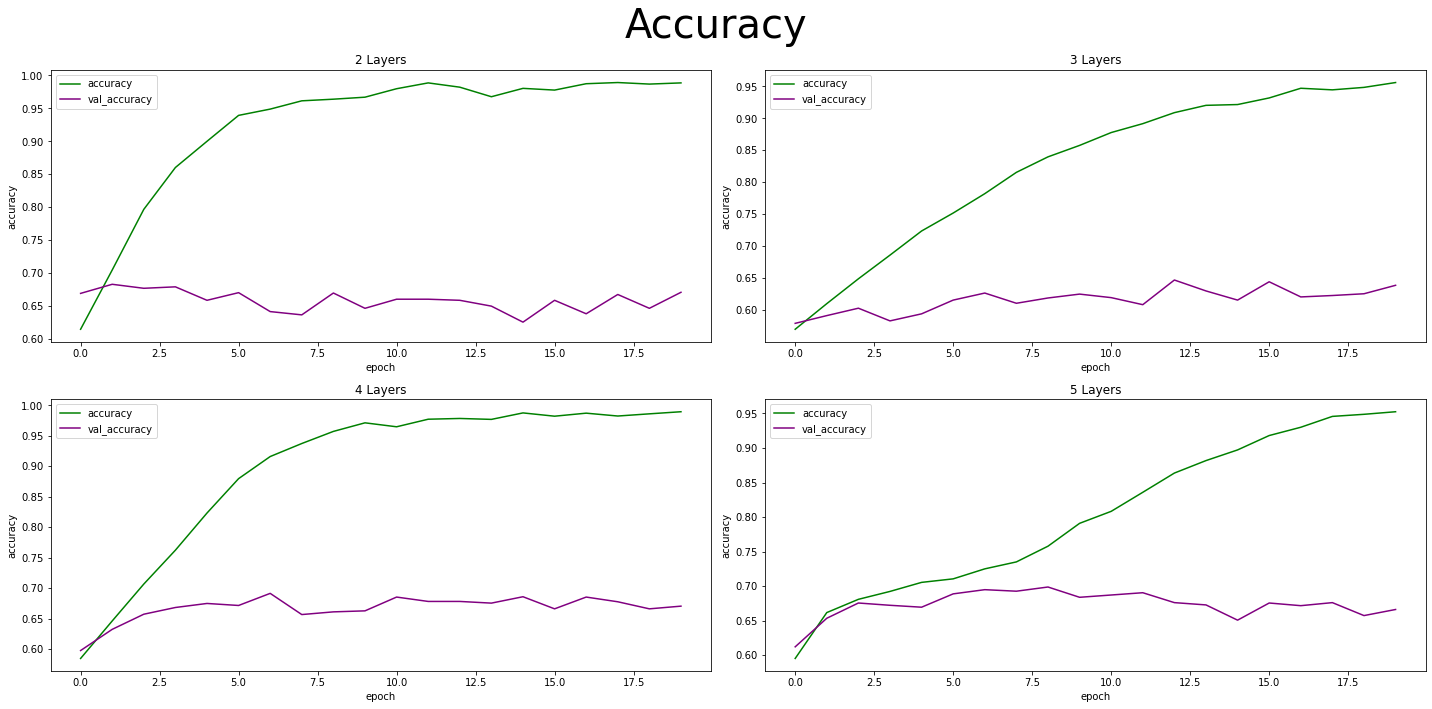

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Accuracy', fontsize=40)
axs[0, 0].plot(hist_2.history['accuracy'], color='green', label='accuracy')
axs[0, 0].plot(hist_2.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['accuracy'], color='green', label='accuracy')
axs[0, 1].plot(hist_3.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['accuracy'], color='green', label='accuracy')
axs[1, 0].plot(hist_4.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['accuracy'], color='green', label='accuracy')
axs[1, 1].plot(hist_5.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')


fig.tight_layout()

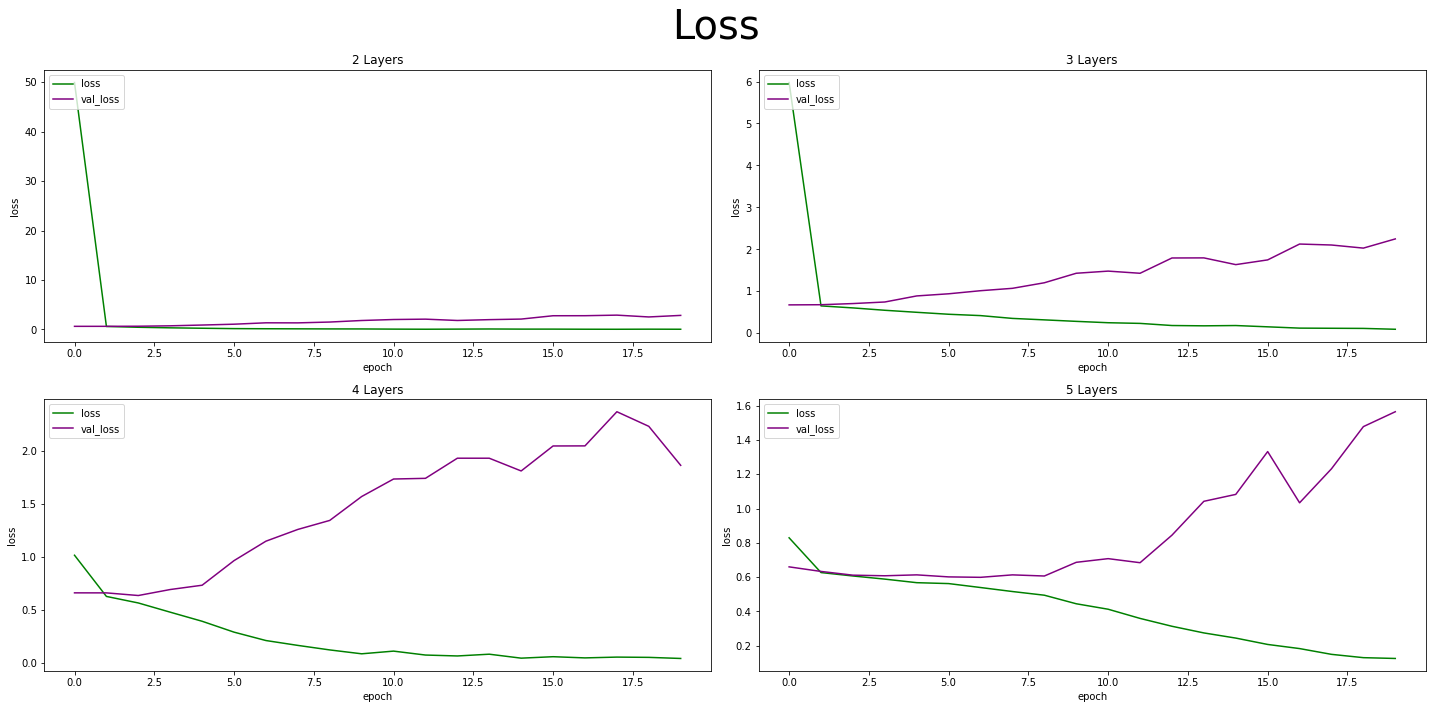

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Loss', fontsize=40)
axs[0, 0].plot(hist_2.history['loss'], color='green', label='loss')
axs[0, 0].plot(hist_2.history['val_loss'], color='purple', label='val_loss')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['loss'], color='green', label='loss')
axs[0, 1].plot(hist_3.history['val_loss'], color='purple', label='val_loss')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['loss'], color='green', label='loss')
axs[1, 0].plot(hist_4.history['val_loss'], color='purple', label='val_loss')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['loss'], color='green', label='loss')
axs[1, 1].plot(hist_5.history['val_loss'], color='purple', label='val_loss')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')


fig.tight_layout()

### Creating another model using Softmax activation

In [209]:
mod_smx = Sequential()

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Flatten())

mod_smx.add(Dense(256, activation='relu'))
mod_smx.add(Dense(1, activation='softmax'))

In [42]:
mod_smx.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
mod_smx.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 32)      

### Another model using SVM

In [44]:
mod_svm = Sequential()

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Flatten())

mod_svm.add(Dense(256, activation='relu'))
mod_svm.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation ='linear'))

In [45]:
mod_svm.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [46]:
mod_svm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 30, 30, 32)      

#### Training the new models

In [47]:
hist_smx = mod_smx.fit(train_ds, epochs=25, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/25
227/227 [==============================] - 121s 529ms/step - loss: 0.8262 - accuracy: 0.5502 - val_loss: 0.6732 - val_accuracy: 0.5386
Epoch 2/25
227/227 [==============================] - 123s 540ms/step - loss: 0.6469 - accuracy: 0.5502 - val_loss: 0.6416 - val_accuracy: 0.5386
Epoch 3/25
227/227 [==============================] - 129s 566ms/step - loss: 0.6161 - accuracy: 0.5502 - val_loss: 0.6140 - val_accuracy: 0.5386
Epoch 4/25
227/227 [==============================] - 128s 565ms/step - loss: 0.6012 - accuracy: 0.5502 - val_loss: 0.6269 - val_accuracy: 0.5386
Epoch 5/25
227/227 [==============================] - 125s 552ms/step - loss: 0.5866 - accuracy: 0.5502 - val_loss: 0.6169 - val_accuracy: 0.5386
Epoch 6/25
227/227 [==============================] - 120s 528ms/step - loss: 0.5571 - accuracy: 0.5502 - val_loss: 0.6129 - val_accuracy: 0.5386
Epoch 7/25
227/227 [==============================] - 123s 540ms/step - loss: 0.5409 - accuracy: 0.5502 - val_loss: 0.6088 -

In [48]:
hist_svm = mod_svm.fit(train_ds, epochs=25, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/25
227/227 [==============================] - 121s 529ms/step - loss: 0.9005 - accuracy: 0.5950 - val_loss: 0.8564 - val_accuracy: 0.6352
Epoch 2/25
227/227 [==============================] - 119s 524ms/step - loss: 0.7412 - accuracy: 0.6625 - val_loss: 0.7675 - val_accuracy: 0.6760
Epoch 3/25
227/227 [==============================] - 268s 1s/step - loss: 0.6918 - accuracy: 0.6942 - val_loss: 0.6934 - val_accuracy: 0.6727
Epoch 4/25
227/227 [==============================] - 128s 566ms/step - loss: 0.6614 - accuracy: 0.7072 - val_loss: 0.7391 - val_accuracy: 0.6755
Epoch 5/25
227/227 [==============================] - 126s 555ms/step - loss: 0.6682 - accuracy: 0.7021 - val_loss: 0.7002 - val_accuracy: 0.6871
Epoch 6/25
227/227 [==============================] - 121s 532ms/step - loss: 0.6265 - accuracy: 0.7277 - val_loss: 0.6867 - val_accuracy: 0.6959
Epoch 7/25
227/227 [==============================] - 120s 530ms/step - loss: 0.5981 - accuracy: 0.7341 - val_loss: 0.6745 - va

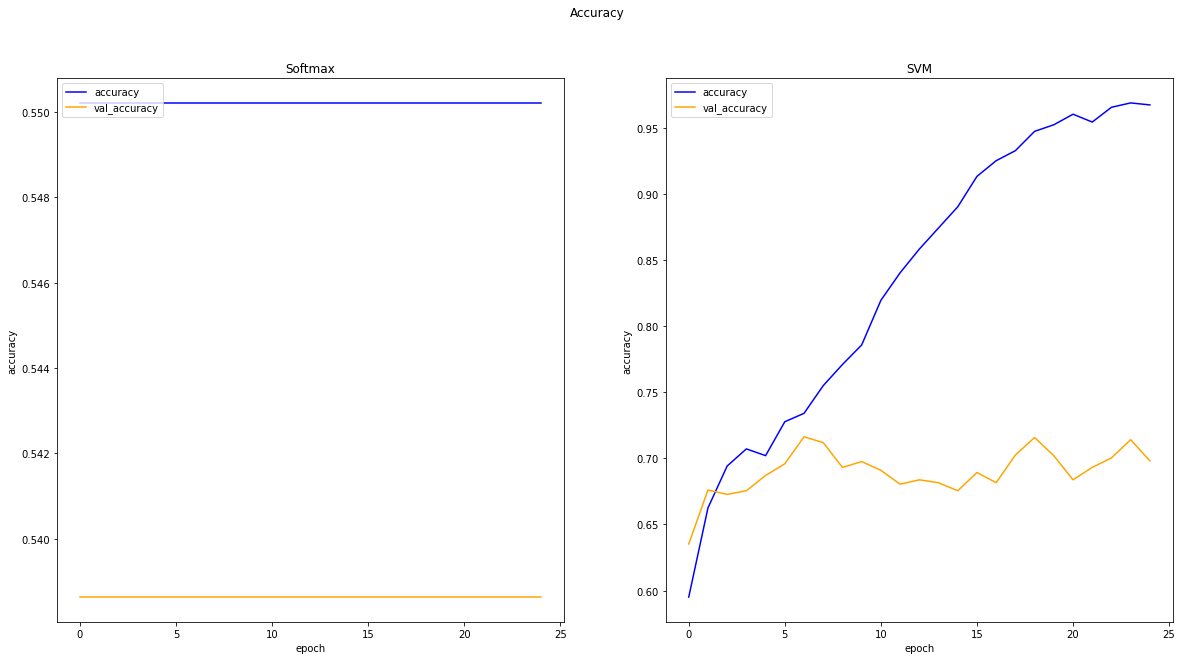

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Accuracy')
axs[0].plot(hist_smx.history['accuracy'], color='blue', label='accuracy')
axs[0].plot(hist_smx.history['val_accuracy'], color='orange', label='val_accuracy')
axs[0].legend(loc="upper left")
axs[0].set_title('Softmax')
axs[1].plot(hist_svm.history['accuracy'], color='blue', label='accuracy')
axs[1].plot(hist_svm.history['val_accuracy'], color='orange', label='val_accuracy')
axs[1].legend(loc="upper left")
axs[1].set_title('SVM')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')


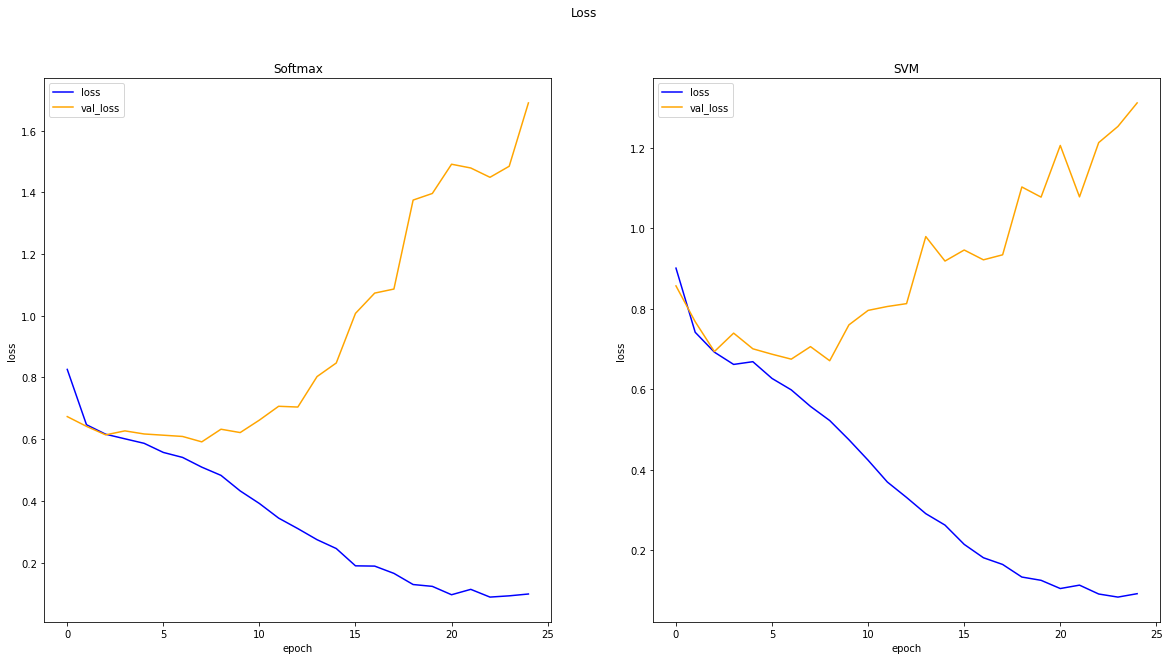

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Loss')
axs[0].plot(hist_smx.history['loss'], color='blue', label='loss')
axs[0].plot(hist_smx.history['val_loss'], color='orange', label='val_loss')
axs[0].legend(loc="upper left")
axs[0].set_title('Softmax')
axs[1].plot(hist_svm.history['loss'], color='blue', label='loss')
axs[1].plot(hist_svm.history['val_loss'], color='orange', label='val_loss')
axs[1].legend(loc="upper left")
axs[1].set_title('SVM')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')



### Augmenting the data

In [51]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

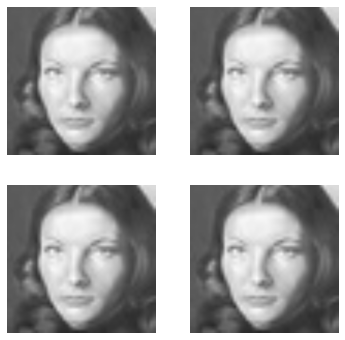

In [52]:
plt.figure(figsize=(6, 6))
for images, _ in train_ds.take(1):
  for i in range(4):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


### Adding a dropout layer

In [53]:
mod_5d = Sequential()

mod_5d.add(data_augmentation)

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Dropout(0.2))

mod_5d.add(Flatten())

mod_5d.add(Dense(256, activation='relu'))
mod_5d.add(Dense(1, activation='sigmoid'))

In [54]:
mod_5d.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [55]:
mod_5d.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 60, 60, 32)       

In [56]:
hist_5d = mod_5d.fit(train_ds, epochs=25, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/25
227/227 [==============================] - 142s 620ms/step - loss: 0.8272 - accuracy: 0.5426 - val_loss: 0.6832 - val_accuracy: 0.5613
Epoch 2/25
227/227 [==============================] - 139s 611ms/step - loss: 0.6791 - accuracy: 0.5812 - val_loss: 0.6774 - val_accuracy: 0.5684
Epoch 3/25
227/227 [==============================] - 135s 596ms/step - loss: 0.6718 - accuracy: 0.5891 - val_loss: 0.6767 - val_accuracy: 0.5695
Epoch 4/25
227/227 [==============================] - 135s 595ms/step - loss: 0.6531 - accuracy: 0.6167 - val_loss: 0.6357 - val_accuracy: 0.6584
Epoch 5/25
227/227 [==============================] - 135s 594ms/step - loss: 0.6420 - accuracy: 0.6451 - val_loss: 0.6257 - val_accuracy: 0.6512
Epoch 6/25
227/227 [==============================] - 135s 595ms/step - loss: 0.6376 - accuracy: 0.6447 - val_loss: 0.6246 - val_accuracy: 0.6705
Epoch 7/25
227/227 [==============================] - 134s 592ms/step - loss: 0.6360 - accuracy: 0.6510 - val_loss: 0.6152 -

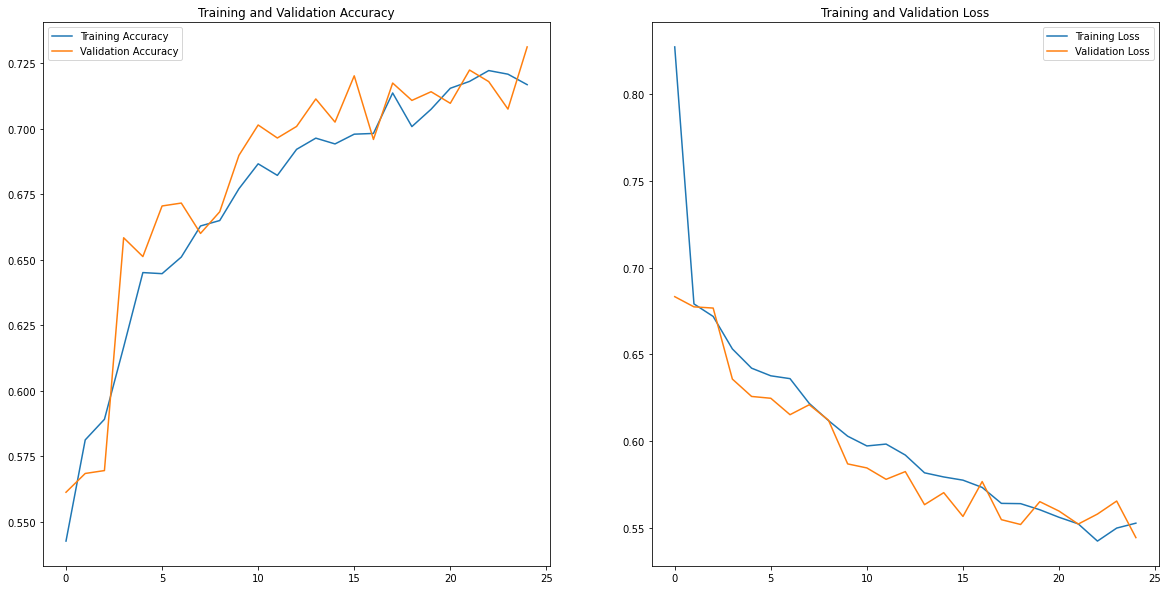

In [57]:
acc = hist_5d.history['accuracy']
val_acc = hist_5d.history['val_accuracy']

loss = hist_5d.history['loss']
val_loss = hist_5d.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Performance Evaluation

In [58]:
import pandas as pd

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [59]:
test_dir = 'data/test'
os.listdir(test_dir)

['fear', 'neutral']

In [147]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(256, 256),
    batch_size = 753)

Found 2257 files belonging to 2 classes.


In [148]:
test_iterator = test_ds.as_numpy_iterator()

In [149]:
test_batch = test_iterator.next()

In [150]:
test_batch[0].shape

(753, 256, 256, 3)

In [151]:
pre = Precision()
re = Recall()
biacc = BinaryAccuracy()

In [152]:
for test_batch in test_ds.as_numpy_iterator(): 
    X, y = test_batch
    yhat = mod_5d.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    biacc.update_state(y, yhat)

In [153]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{biacc.result().numpy()}')

Precision: 0.7334348559379578, Recall:0.7810218930244446, Accuracy:0.7253136038780212


In [154]:
yhat.shape

(751, 1)

In [155]:
yhat

array([[0.4031121 ],
       [0.40919304],
       [0.42417365],
       [0.6247748 ],
       [0.935001  ],
       [0.39013505],
       [0.64375204],
       [0.54810923],
       [0.88933086],
       [0.5319656 ],
       [0.6291572 ],
       [0.10575092],
       [0.95904386],
       [0.47298318],
       [0.7176548 ],
       [0.63510543],
       [0.5798921 ],
       [0.18844405],
       [0.5025196 ],
       [0.45452642],
       [0.40107173],
       [0.31608993],
       [0.30369562],
       [0.5674564 ],
       [0.26062405],
       [0.2549823 ],
       [0.8433876 ],
       [0.28604132],
       [0.51470774],
       [0.5325554 ],
       [0.76746815],
       [0.4744957 ],
       [0.53400147],
       [0.7647065 ],
       [0.44675523],
       [0.636608  ],
       [0.7910049 ],
       [0.40810663],
       [0.23943275],
       [0.5176879 ],
       [0.6405114 ],
       [0.7996876 ],
       [0.34112787],
       [0.42982903],
       [0.8423324 ],
       [0.69628835],
       [0.27653348],
       [0.852

In [156]:
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,

In [157]:
y.shape

(751,)

In [159]:
thresh = 0.5

yhat_binary = np.where(yhat > thresh, 1, 0)
yhat_binary

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [160]:
yy = yhat_binary.reshape(751)
yy.shape

(751,)

In [161]:
df = pandas.DataFrame({"True": y, "Pred": yy})
print(df)

     True  Pred
0       1     0
1       1     0
2       1     0
3       1     1
4       1     1
..    ...   ...
746     1     1
747     1     0
748     0     0
749     0     0
750     0     0

[751 rows x 2 columns]


### Confusion Matrix

In [162]:
cm = confusion_matrix(y, yy)

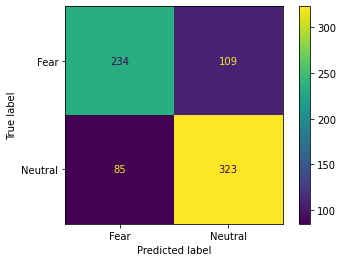

In [164]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fear', 'Neutral'])

cm_display.plot()
plt.show()

## ROC Curve

In [165]:
from sklearn.metrics import roc_curve, auc

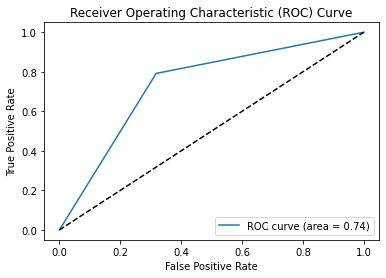

In [166]:
fpr, tpr, thresholds = roc_curve(y, yy)

# Computing the AUC score
roc_auc = auc(fpr, tpr)

#Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Image Prediction

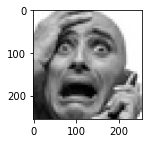

In [191]:
from tensorflow.keras.preprocessing import image

test_image = image.load_img('data/test/fear/PublicTest_80861502.jpg', target_size = (255,255))
plt.figure(figsize=(2, 2))
plt.imshow(test_image);

In [192]:
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = mod_5d.predict(test_image)

In [193]:
result

array([[0.61366713]], dtype=float32)

In [194]:
rr = result.reshape(1)
fear_conf = round(rr[0] * 100, 2)
neut_conf = round(100-(rr[0] * 100), 2)

print(f'Emotion prediction\n\nFear: {fear_conf}%\nNeutral: {neut_conf}%')

Emotion prediction

Fear: 61.37%
Neutral: 38.63%


In [195]:
if result < 0.5: 
    print(f'Predicted class is Neutral')
else:
    print(f'Predicted class is Fear')

Predicted class is Fear


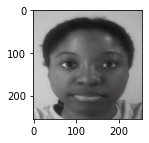

In [205]:
test_image2 = image.load_img('/Users/moyojimi/Desktop/Dissertation/Code/imgtest/neut.jpg', target_size = (255,255))
plt.figure(figsize=(2, 2))
plt.imshow(test_image2);

In [206]:
test_image2 = image.img_to_array(test_image2)
test_image2 = test_image2/255
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = mod_5d.predict(test_image2)
result2

array([[0.6143708]], dtype=float32)

In [207]:
rr2 = result2.reshape(1)
fear_conf2 = round(rr2[0] * 100, 2)
neut_conf2 = round(100-(rr2[0] * 100), 2)

print(f'Emotion prediction\n\nFear: {fear_conf2}%\nNeutral: {neut_conf2}%')

Emotion prediction

Fear: 61.44%
Neutral: 38.56%


In [208]:
if result2 < 0.5: 
    print(f'Predicted class is Neutral')
else:
    print(f'Predicted class is Fear')

Predicted class is Fear


## Conclusion

The fear-neutral image classifier was trained on balanced datasets and was able to achieve a decent accuracy score. Initially the model was overfitting but the implemenation of data augmentation and a dropout layer improved the model and it fit well to the training data. Unfortunately, the model was not able to make the correct predictions on the neutral test image. This could be due to the fact that neutral expressions are more subtle and less distinguishable than fear expressions, making it harder for the model to learn the relevant features.